<a href="https://colab.research.google.com/github/among5094/AI_lecture/blob/main/3%2C4%EA%B0%95_%EC%86%8C%ED%94%84%ED%8A%B8%EB%B2%A1%ED%84%B0%EB%A8%B8%EC%8B%A0/%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5%EA%B0%95%EC%9D%983%EA%B0%95_%EC%86%8C%ED%94%84%ED%8A%B8%EB%B2%A1%ED%84%B0%EB%A8%B8%EC%8B%A0_lecture_svm_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 인공지능강의3강: 소프트벡터머신
- 직관적으로 나눌 수 있다는 것이 매우 유리한 도구라는 거임.
- 계산속도도 빠르고 y=ax를 구할 수 있어서 학술적으로 가치도 높음


### 필기

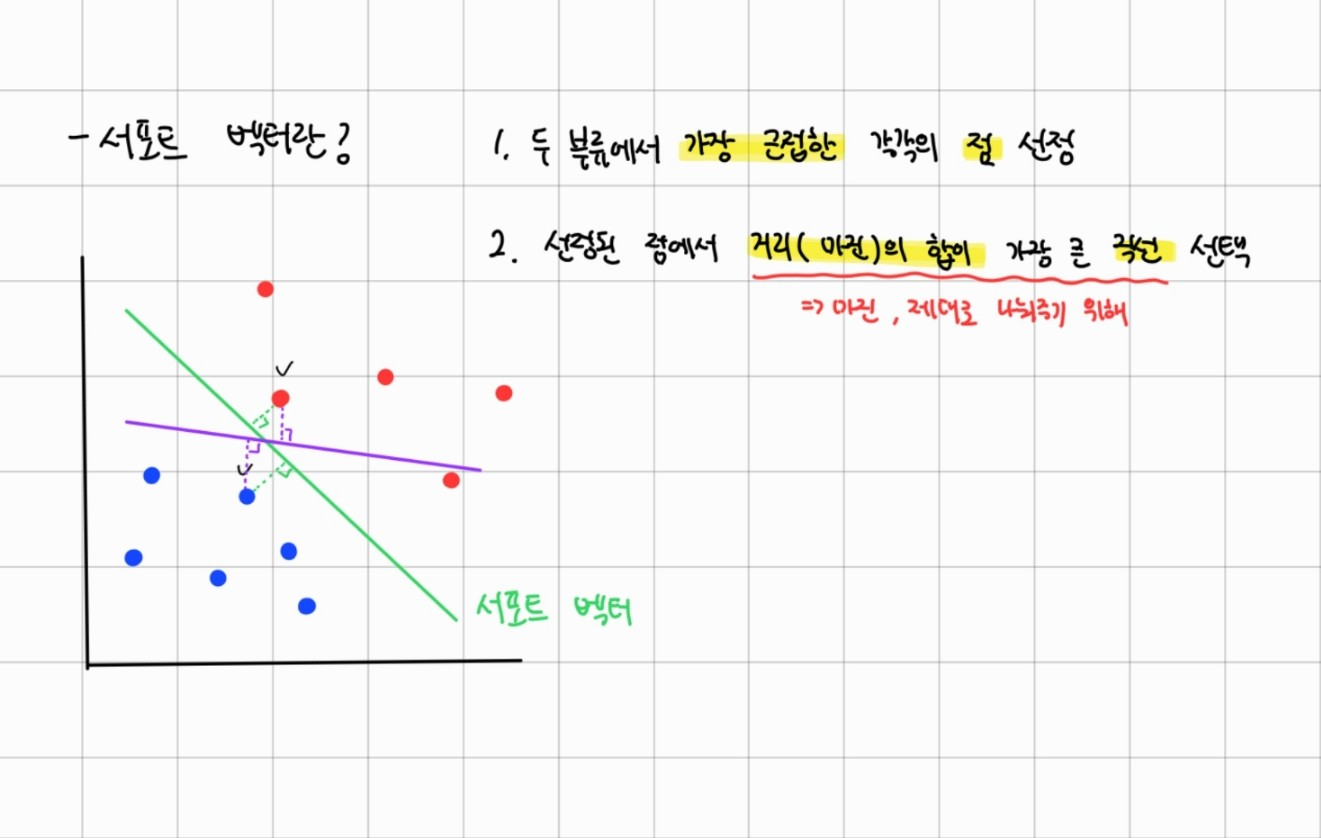

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
A=pd.read_csv("/content/test4.csv")
A_x=np.array(A['x']).reshape(-1,1)
A_y=np.array(A['y']).reshape(-1,1)
A_z=np.array(A['z']).reshape(-1,1)

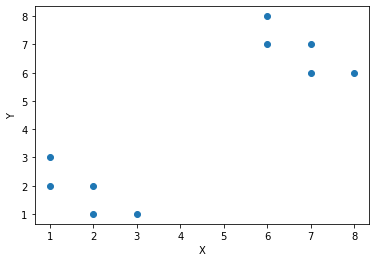

In [ ]:
x=np.arange(0,10)
plt.scatter(A_x,A_y)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [ ]:
data=np.column_stack((A_x, A_y))
data

array([[1, 2],
       [2, 1],
       [3, 1],
       [1, 3],
       [2, 2],
       [7, 7],
       [6, 8],
       [8, 6],
       [7, 6],
       [6, 7]])

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input,train_output,test_output=train_test_split(data, A_z)#데이터 섞기
#input은 데이터, z는 타켓데이터

In [ ]:
test_input

array([[6, 7],
       [8, 6],
       [1, 2]])

In [ ]:

from sklearn import svm
svc=svm.SVC(kernel = 'linear', C=1) #객체만들기
#C값이 높아질수록 실수를 용납하지 않음
#그래서 C값을 hyper parameter라고 함. 인간이 정해주는 어떤 변수라는 뜻




#C high=no exception, hyper parameter
#svc=svm.SVC(kernel = 'poly', C=1)
#svc=svm.SVC(kernel = 'rbf', C=1)

In [ ]:
#교육시키기
svc.fit(train_input,train_output)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1, kernel='linear')

In [ ]:
#예측하기
svc.predict(test_input)

array([1, 1, 0])

In [ ]:
test_output

array([[1],
       [1],
       [0]])

In [ ]:
#중요한 건 train이 아니라 test임!!
#test를 넣으면 의미가 없음
svc.score(test_input,test_output)

1.0

In [ ]:

coef=np.array(svc.coef_) # coefficient: 계수
coef

#결과: 첫 번째는 a1, 두 번째는 a2

array([[0.22215348, 0.22227722]])

In [ ]:
a2=coef[0][1]
a1=coef[0][0]

In [ ]:
inter=svc.intercept_
inter

array([-1.88882015])

In [ ]:
a=-(a1/a2) #기울기
b=-(inter[0]/a2) #y절편

#y=ax+b
a,b

#결과: 첫 번째는 기울기, 두 번째는 y절편

(-0.9994433263392276, 8.497587747469984)

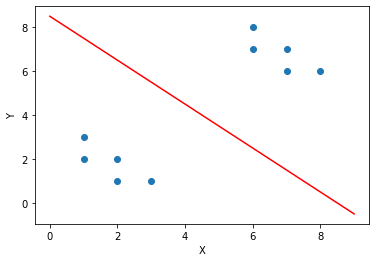

In [ ]:
x=np.arange(0,10)
plt.plot(x,a*x+b,'r')
plt.scatter(A_x,A_y)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

#결과: 빨간색 일차식이 서포트벡터임